In [1]:
import copy
import random
import itertools
import numpy as np

from matplotlib import pyplot

In [2]:
class SortingNetwork():
    comparators = []
    seen = set()

    def objective(self, comps):
        is_network = self.is_sorting_network(comps)
        if is_network:
            return len(comps)
        else:
            return len(self.comparators) + len(comps)

    def genPair(self, m, n):
        tmp = []
        for i in range(m, n):
            for j in range(m, n):
                if i == j:
                    continue
                tmp.append((i, j))
        return tmp

    def __init__(self, arr) -> None:
        self.comparators = self.genPair(0, len(arr))
        self.arr = arr

    def is_sorting_network(self, network):
        permutations = list(itertools.permutations(self.arr))
        if len(network) == 0:
            return False
        for perm in permutations:
            arr = self.sort(network, list(perm))
            if arr != sorted(self.arr):
                return False
        return True

    def sort(self, comps, arr=None):
        if comps is None:
            comps = self.comparators
        if arr is None:
            arr = copy.deepcopy(self.arr)
        for x, y in comps:
            if x > y and arr[x] < arr[y]:
                arr[x], arr[y] = arr[y], arr[x]
            if x < y and arr[x] > arr[y]:
                arr[x], arr[y] = arr[y], arr[x]
        return arr

    def simulated_annealing(self, n_iterations, temp, mutation_prob, cooling_method='linear', temp_diff=0.01):
        best = self.comparators
        best_eval = len(best)
        curr, curr_eval = copy.deepcopy(self.comparators), best_eval
        scores = [best_eval]
        best_scores = [best_eval]
        temps = []
        for i in range(n_iterations):
            if len(curr) == 1:
                curr = best
            selection = random.randint(0, len(curr)-1)
            candidate = copy.deepcopy(curr)
            candidate.pop(selection)
            if random.random() < mutation_prob:
                num_1 = np.random.randint(0, len(candidate))
                num_2 = np.random.randint(0, len(candidate))
                candidate[num_1], candidate[num_2] = candidate[num_2], candidate[num_1]
            # is_network = self.is_sorting_network(candidate)
            # print(f"{curr} {is_network}")
            candidate_eval = self.objective(candidate)
            curr_eval = self.objective(curr)
            # print(f"{candidate_eval} < {best_eval} {is_network}")
            if candidate_eval < best_eval:# and is_network:
                # print(f'new best {candidate_eval}')
                best, best_eval = candidate, candidate_eval
            diff = candidate_eval - curr_eval
            curr = best
            if cooling_method == 'geometric':
                t = temp / float(i + 1)
                metropolis = np.exp(-diff / t)
                if diff > 0 and random.uniform(0, t) < metropolis:
                    # store the new current point
                    curr, curr_eval = candidate, candidate_eval
                temps.append(t)
            else:
                temp -= temp_diff
                metropolis = np.exp(-diff / temp)
                if diff > 0 and random.uniform(0, temp) < metropolis:
                    # store the new current point
                    curr, curr_eval = candidate, candidate_eval
                temps.append(temp)
            best_scores.append(best_eval)
            scores.append(candidate_eval)
        return [best, best_eval, scores, temps, best_scores]

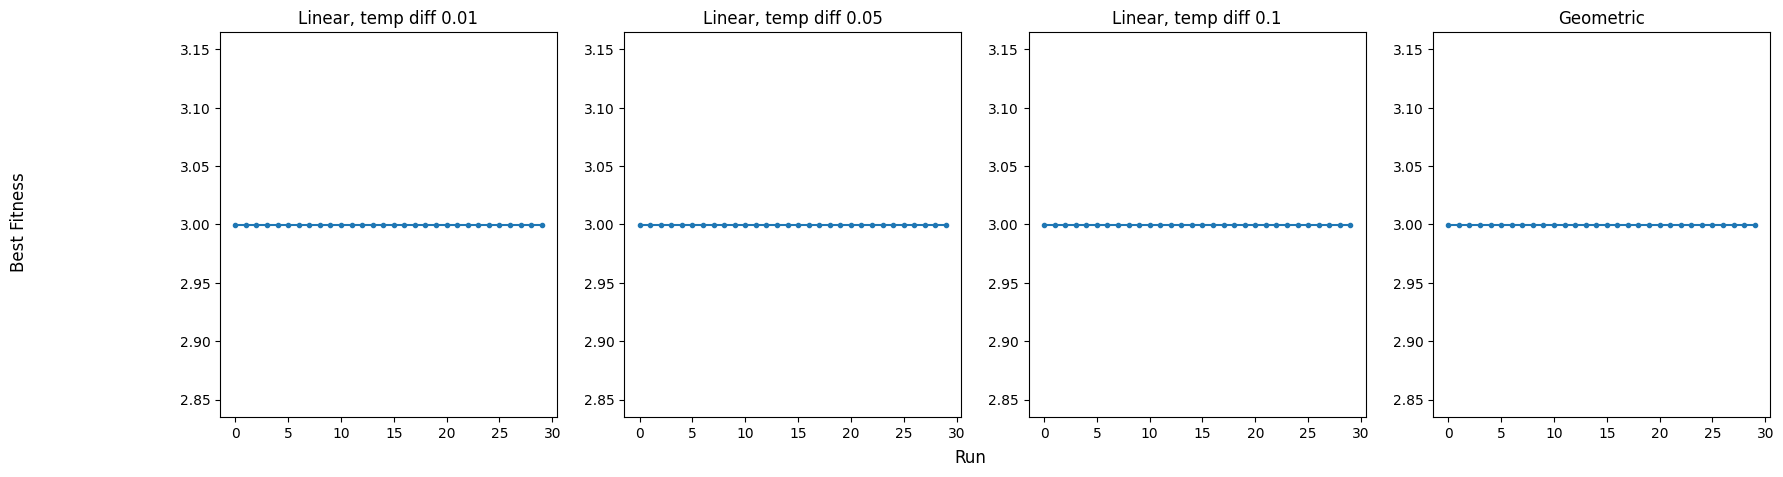

In [4]:
arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp10_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.01)
    best_score_len3_temp10_diff0_01.append(score)


arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp10_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.05)
    best_score_len3_temp10_diff0_05.append(score)

arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp10_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.1)
    best_score_len3_temp10_diff0_1.append(score)

arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp10_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, cooling_method='geometric')
    best_score_len3_temp10_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len3_temp10_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len3_temp10_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len3_temp10_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len3_temp10_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

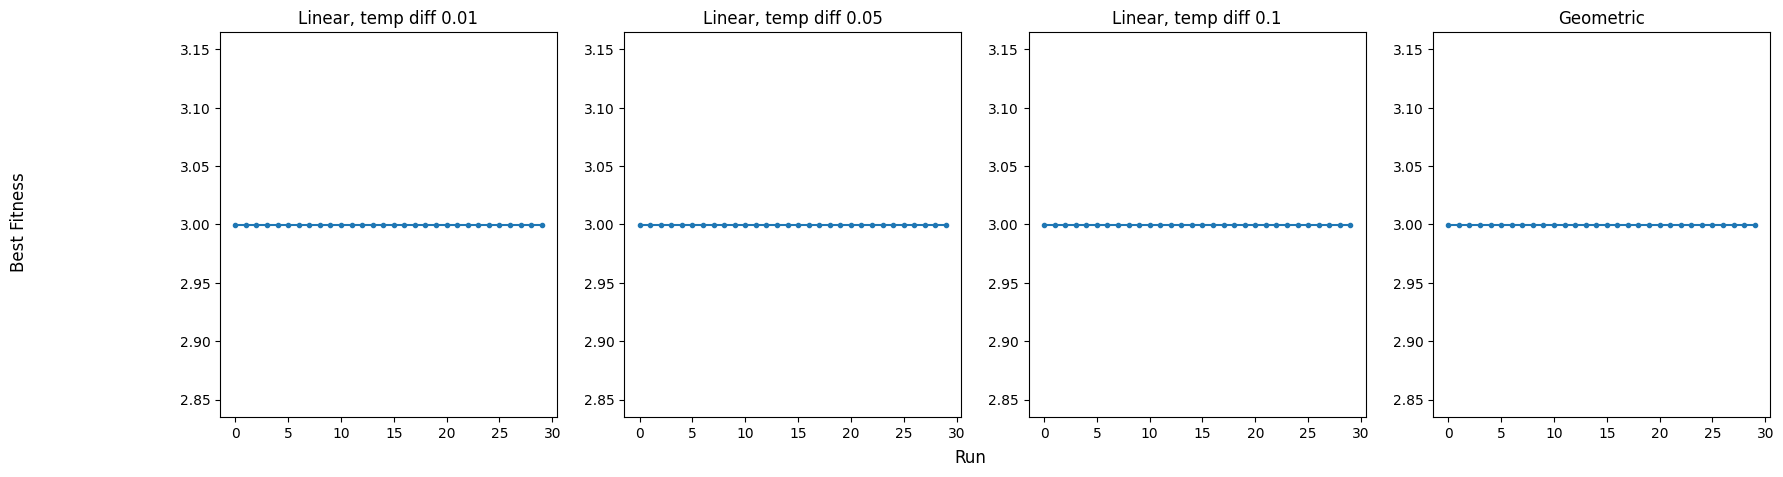

In [7]:
arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp5_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.01)
    best_score_len3_temp5_diff0_01.append(score)


arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp5_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.05)
    best_score_len3_temp5_diff0_05.append(score)

arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp5_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.1)
    best_score_len3_temp5_diff0_1.append(score)

arr = [2,1,0]
network = SortingNetwork(arr)

best_score_len3_temp5_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, cooling_method='geometric')
    best_score_len3_temp5_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len3_temp5_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len3_temp5_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len3_temp5_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len3_temp5_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

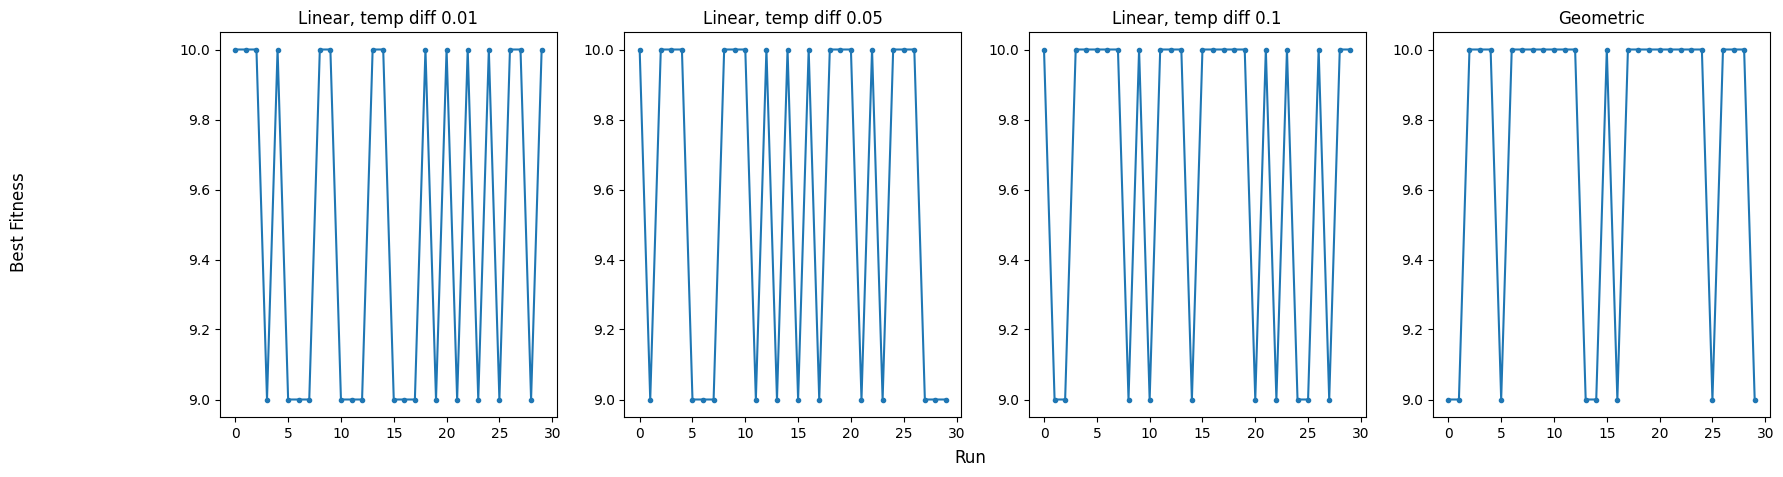

In [5]:
arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp10_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.01)
    best_score_len5_temp10_diff0_01.append(score)


arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp10_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.05)
    best_score_len5_temp10_diff0_05.append(score)

arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp10_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.1)
    best_score_len5_temp10_diff0_1.append(score)

arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp10_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, cooling_method='geometric')
    best_score_len5_temp10_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len5_temp10_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len5_temp10_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len5_temp10_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len5_temp10_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

C:\Users\alesk\AppData\Local\Temp\ipykernel_30952\1217698319.py:83: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-diff / temp)


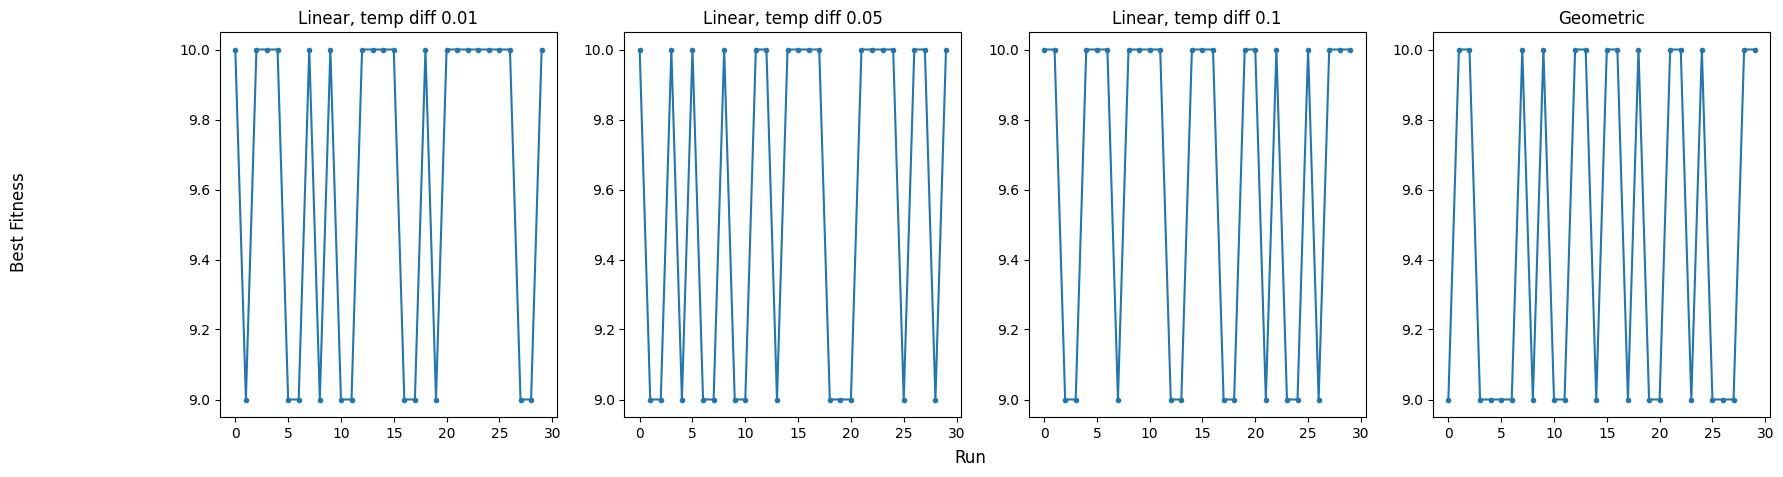

In [8]:
arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp5_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.01)
    best_score_len5_temp5_diff0_01.append(score)


arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp5_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.05)
    best_score_len5_temp5_diff0_05.append(score)

arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp5_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.1)
    best_score_len5_temp5_diff0_1.append(score)

arr = [4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len5_temp5_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, cooling_method='geometric')
    best_score_len5_temp5_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len5_temp5_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len5_temp5_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len5_temp5_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len5_temp5_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

C:\Users\alesk\AppData\Local\Temp\ipykernel_30952\1217698319.py:83: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-diff / temp)


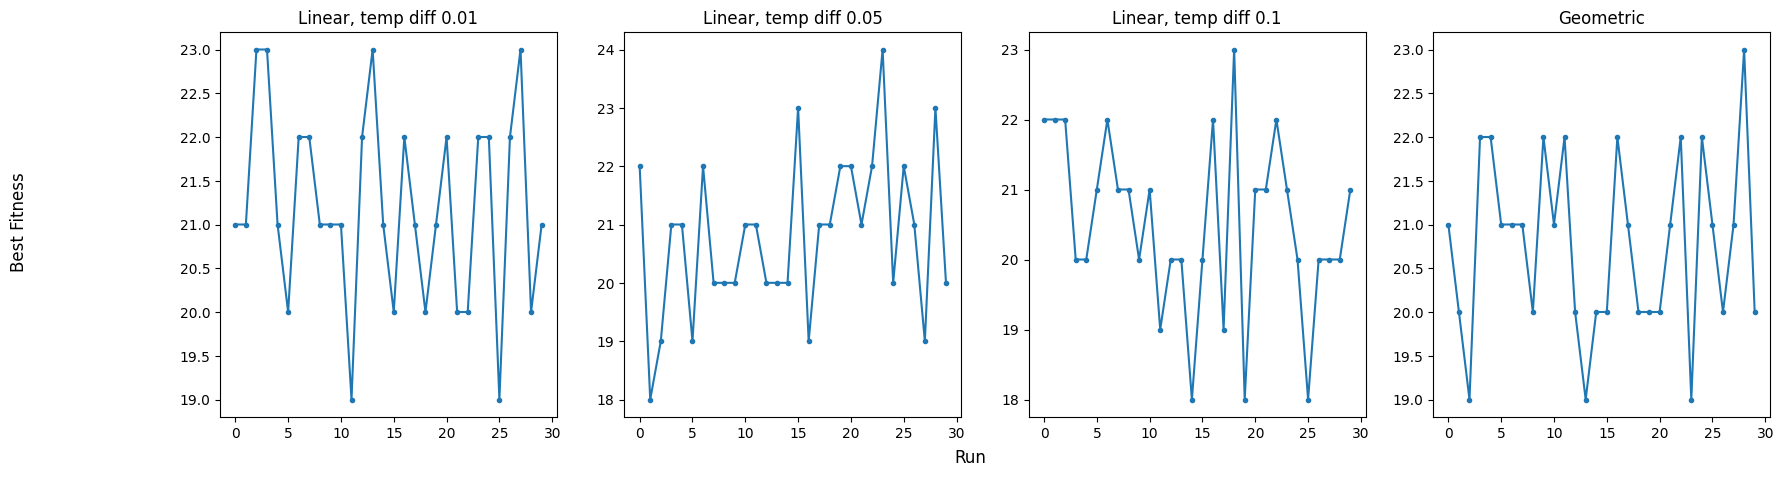

In [6]:
arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp10_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.01)
    best_score_len7_temp10_diff0_01.append(score)

arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp10_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.05)
    best_score_len7_temp10_diff0_05.append(score)

arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp10_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.1)
    best_score_len7_temp10_diff0_1.append(score)

arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp10_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, cooling_method='geometric')
    best_score_len7_temp10_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len7_temp10_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len7_temp10_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len7_temp10_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len7_temp10_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

In [3]:
arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)
final_score = []
for temp in range(1, 10):
    inside_score = []
    for _ in range(30):
        best, score, scores, temps, best_scores = network.simulated_annealing(100, temp, 0.5, temp_diff=0.01, cooling_method='geometric')
        inside_score.append(score)
    final_score.append(inside_score)

In [5]:
scores_10 = []
for _ in range(30):
    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.01, cooling_method='geometric')
    scores_10.append(score)

In [7]:
scores_15 = []
for _ in range(30):
    best, score, scores, temps, best_scores = network.simulated_annealing(100, 15, 0.5, temp_diff=0.01, cooling_method='geometric')
    scores_15.append(score)

scores_20 = []
for _ in range(30):
    best, score, scores, temps, best_scores = network.simulated_annealing(100, 20, 0.5, temp_diff=0.01, cooling_method='geometric')
    scores_20.append(score)

scores_50 = []
for _ in range(30):
    best, score, scores, temps, best_scores = network.simulated_annealing(100, 50, 0.5, temp_diff=0.01, cooling_method='geometric')
    scores_50.append(score)


[Text(1, 0, 'Temp 1'),
 Text(2, 0, 'Temp 5'),
 Text(3, 0, 'Temp 10'),
 Text(4, 0, 'Temp 15'),
 Text(5, 0, 'Temp 20'),
 Text(6, 0, 'Temp 50')]

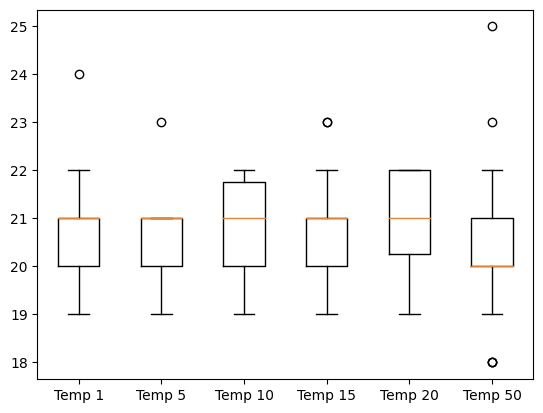

In [8]:
def get_list(index):
    in_graph = []
    for x in range(len(final_score)):
        in_graph.append(final_score[x][index])
    return in_graph

lowest_temp = get_list(0)
mid_temp = get_list(5)
hight_temp = get_list(9)

box = {
    'Temp 1' : lowest_temp,
    'Temp 5' : mid_temp,
    'Temp 10' : scores_10,
    'Temp 15' : scores_15,
    'Temp 20' : scores_20,
    'Temp 50' : scores_50,
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())

C:\Users\alesk\AppData\Local\Temp\ipykernel_30952\1217698319.py:83: RuntimeWarning: overflow encountered in exp
  metropolis = np.exp(-diff / temp)


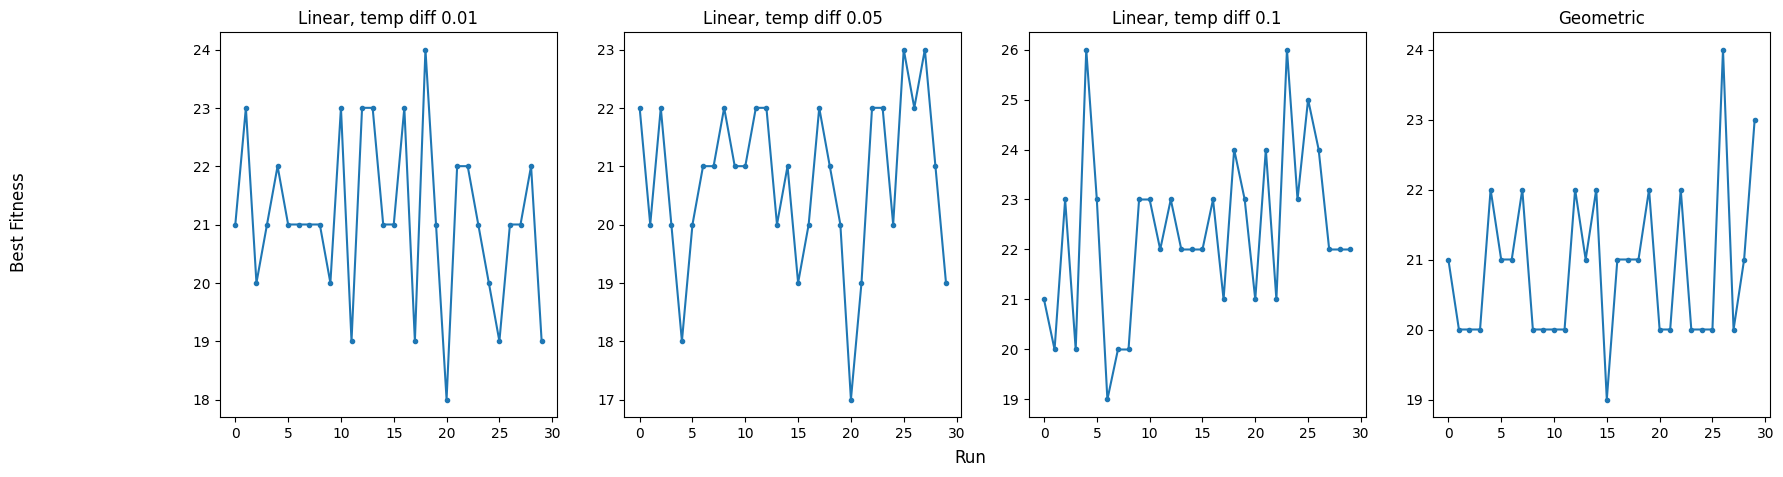

In [9]:
arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp5_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.01)
    best_score_len7_temp5_diff0_01.append(score)

arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp5_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.05)
    best_score_len7_temp5_diff0_05.append(score)

arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp5_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.1)
    best_score_len7_temp5_diff0_1.append(score)

arr = [6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len7_temp5_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, cooling_method='geometric')
    best_score_len7_temp5_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len7_temp5_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len7_temp5_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len7_temp5_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len7_temp5_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

In [18]:
arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp10_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.01)
    best_score_len9_temp10_diff0_01.append(score)

arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp10_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.05)
    best_score_len9_temp10_diff0_05.append(score)

arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp10_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, temp_diff=0.1)
    best_score_len9_temp10_diff0_1.append(score)

arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp10_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 10, 0.5, cooling_method='geometric')
    best_score_len9_temp10_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len9_temp10_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len9_temp10_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len9_temp10_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len9_temp10_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

KeyboardInterrupt: 

In [ ]:
arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp5_diff0_01 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.01)
    best_score_len9_temp5_diff0_01.append(score)

arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp5_diff0_05 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.05)
    best_score_len9_temp5_diff0_05.append(score)

arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp5_diff0_1 = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, temp_diff=0.1)
    best_score_len9_temp5_diff0_1.append(score)

arr = [8,7,6,5,4,3,2,1,0]
network = SortingNetwork(arr)

best_score_len9_temp5_geo = []
for _ in range(30):

    best, score, scores, temps, best_scores = network.simulated_annealing(100, 5, 0.5, cooling_method='geometric')
    best_score_len9_temp5_geo.append(score)


figure, axis = pyplot.subplots(1, 4, figsize=(20, 5))
axis[0].plot(best_score_len9_temp5_diff0_01, '.-')
axis[0].set_title("Linear, temp diff 0.01")

axis[1].plot(best_score_len9_temp5_diff0_05, '.-')
axis[1].set_title("Linear, temp diff 0.05")

axis[2].plot(best_score_len9_temp5_diff0_1, '.-')
axis[2].set_title("Linear, temp diff 0.1")

axis[3].plot(best_score_len9_temp5_geo, '.-')
axis[3].set_title("Geometric")

figure.supxlabel('Run')
figure.supylabel('Best Fitness')

pyplot.show()

[Text(1, 0, 'Linear, diff 0.01'),
 Text(2, 0, 'Linear, diff 0.05'),
 Text(3, 0, 'Linear, diff 0.1'),
 Text(4, 0, 'Geometric')]

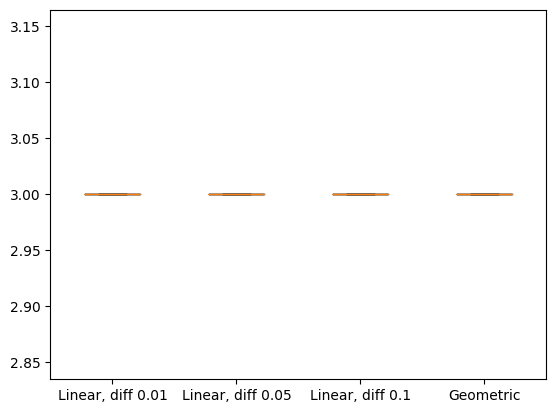

In [11]:
box = {
    'Linear, diff 0.01' : best_score_len3_temp10_diff0_01,
    'Linear, diff 0.05' : best_score_len3_temp10_diff0_05,
    'Linear, diff 0.1' : best_score_len3_temp10_diff0_1,
    'Geometric' : best_score_len3_temp10_geo
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())

[Text(1, 0, 'Linear, diff 0.01'),
 Text(2, 0, 'Linear, diff 0.05'),
 Text(3, 0, 'Linear, diff 0.1'),
 Text(4, 0, 'Geometric')]

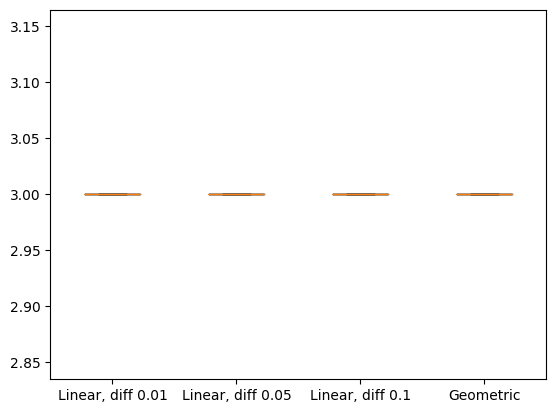

In [12]:
box = {
    'Linear, diff 0.01' : best_score_len3_temp5_diff0_01,
    'Linear, diff 0.05' : best_score_len3_temp5_diff0_05,
    'Linear, diff 0.1' : best_score_len3_temp5_diff0_1,
    'Geometric' : best_score_len3_temp5_geo
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())

[Text(1, 0, 'Linear, diff 0.01'),
 Text(2, 0, 'Linear, diff 0.05'),
 Text(3, 0, 'Linear, diff 0.1'),
 Text(4, 0, 'Geometric')]

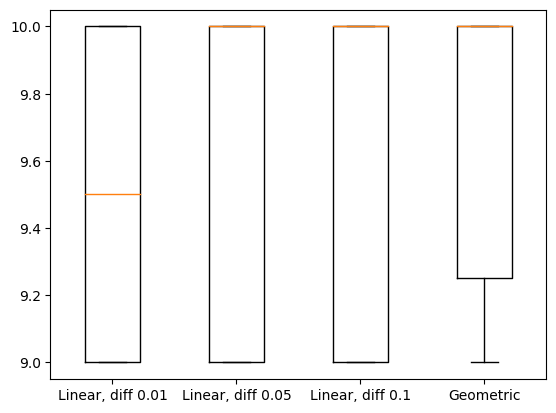

In [14]:
box = {
    'Linear, diff 0.01' : best_score_len5_temp10_diff0_01,
    'Linear, diff 0.05' : best_score_len5_temp10_diff0_05,
    'Linear, diff 0.1' : best_score_len5_temp10_diff0_1,
    'Geometric' : best_score_len5_temp10_geo
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())

[Text(1, 0, 'Linear, diff 0.01'),
 Text(2, 0, 'Linear, diff 0.05'),
 Text(3, 0, 'Linear, diff 0.1'),
 Text(4, 0, 'Geometric')]

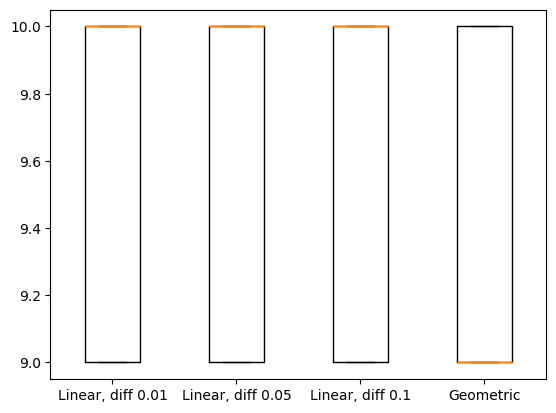

In [15]:
box = {
    'Linear, diff 0.01' : best_score_len5_temp5_diff0_01,
    'Linear, diff 0.05' : best_score_len5_temp5_diff0_05,
    'Linear, diff 0.1' : best_score_len5_temp5_diff0_1,
    'Geometric' : best_score_len5_temp5_geo
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())

[Text(1, 0, 'Linear, diff 0.01'),
 Text(2, 0, 'Linear, diff 0.05'),
 Text(3, 0, 'Linear, diff 0.1'),
 Text(4, 0, 'Geometric')]

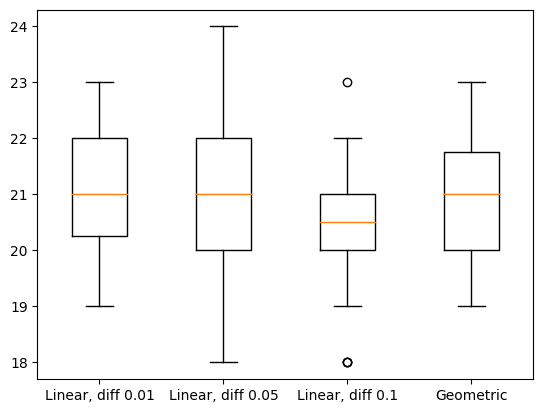

In [16]:
box = {
    'Linear, diff 0.01' : best_score_len7_temp10_diff0_01,
    'Linear, diff 0.05' : best_score_len7_temp10_diff0_05,
    'Linear, diff 0.1' : best_score_len7_temp10_diff0_1,
    'Geometric' : best_score_len7_temp10_geo
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())

[Text(1, 0, 'Linear, diff 0.01'),
 Text(2, 0, 'Linear, diff 0.05'),
 Text(3, 0, 'Linear, diff 0.1'),
 Text(4, 0, 'Geometric')]

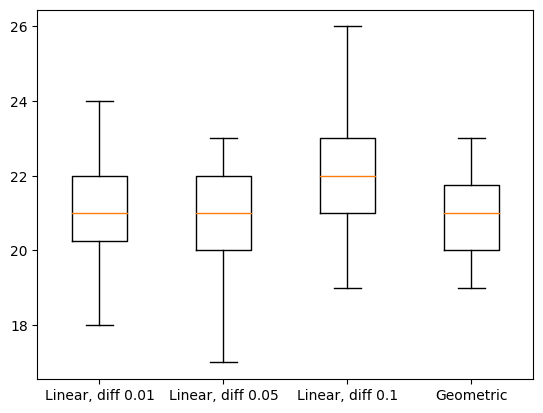

In [17]:
box = {
    'Linear, diff 0.01' : best_score_len7_temp5_diff0_01,
    'Linear, diff 0.05' : best_score_len7_temp5_diff0_05,
    'Linear, diff 0.1' : best_score_len7_temp5_diff0_1,
    'Geometric' : best_score_len7_temp10_geo
}

fig, ax = pyplot.subplots()
ax.boxplot(box.values())
ax.set_xticklabels(box.keys())